<a href="https://colab.research.google.com/github/DhanvinS/ML_Models-Supervised-and-Unsupervised/blob/main/K%20Means%20Classifier%20%26%20KNN/Agglomerative_Hierarchial_clustering_and_K_means_using_Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files = files.upload()

Saving gaussianData.csv to gaussianData.csv


In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [6]:
df = pd.read_csv('gaussianData.csv', header = None, names = ['feature 1', 'feature 2', 'label'])
df.tail()

,feature 1,feature 2,label
595,-1.243304,-1.477397,2
596,0.107205,-4.080892,2
597,-0.320960,-1.420507,2
598,2.491047,-3.197802,2
599,-1.906039,-0.896110,2


**Agglomerative Hierarchial Clustering along with Gaussian Mixture model**

🔹 Use Agglomerative clustering to estimate how many clusters or initial groupings exist.  

🔹 Then fit a GMM, using those labels as a smart starting point (instead of random init or K-means init).

In [8]:
X = df[['feature 1', 'feature 2']].values
y = df['label']

Text(0, 0.5, 'Feature 2')

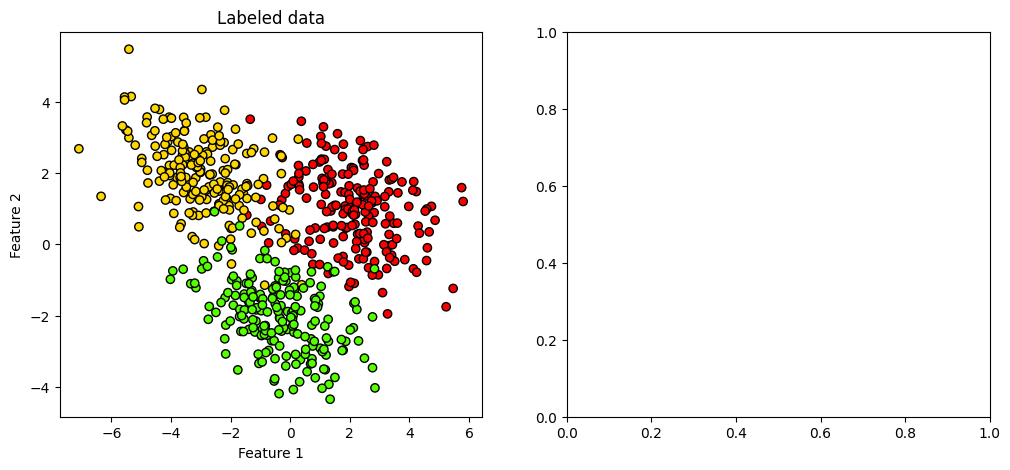

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
# Plot the original data points.
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='prism', edgecolors='k')
ax[0].set_title('Labeled data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

In [11]:
# Number of clusters
nCluster = 3
# Perform agglomerative hierarchical clustering. The output is
# (n-1) x 4 matrix, where n is the number of data points
# the first two columns contain the clusters being merged
# third column = distance between the clusters
# fourth column = number of data points in the new cluster
Z = linkage(X, method='ward', metric='euclidean')
print('Linkage output: \n', Z)
np.savetxt('linkage_matrix.txt', Z, fmt='%d', delimiter=',')

Linkage output: 
 [[2.65000000e+02 2.70000000e+02 8.87373810e-03 2.00000000e+00]
 [2.31000000e+02 3.45000000e+02 9.28002503e-03 2.00000000e+00]
 [4.30000000e+02 5.16000000e+02 9.51158102e-03 2.00000000e+00]
 ...
 [1.18900000e+03 1.19200000e+03 2.41736496e+01 2.02000000e+02]
 [1.19500000e+03 1.19600000e+03 5.42272920e+01 4.14000000e+02]
 [1.19400000e+03 1.19700000e+03 7.44709523e+01 6.00000000e+02]]


Text(42.097222222222214, 0.5, 'Distance')

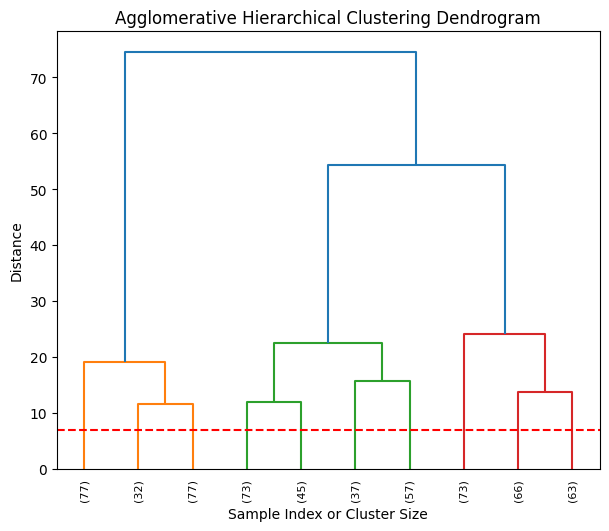

In [12]:
# Create the dendrogram
plt.figure(figsize=(6, 5))
dendrogram(
Z,
leaf_rotation=90., # Rotate the leaf labels
leaf_font_size=8., # Set font size for labels
truncate_mode='lastp', # Show only the last 'p' merged clusters
p=10, # Show 10 leaves
show_leaf_counts=True # Show the number of points in each leaf
)
plt.axhline(y=7, color='r', linestyle='--') # Add a horizontal line to visualize the cut
plt.tight_layout()
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')

In [13]:
# Create the Agglomerative Hierarchical Clustering (AHC) model with 3 clusters
ahc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
# Train the model
cluster_labels = ahc.fit_predict(X)
print("--- Agglomerative Clustering Results ---")
# Count the size of each cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
print(f"Cluster sizes: {dict(zip(unique, counts))}")

--- Agglomerative Clustering Results ---
Cluster sizes: {np.int64(0): np.int64(202), np.int64(1): np.int64(186), np.int64(2): np.int64(212)}


In [15]:
# Initialize GaussianMixture with K-means initialization
# and the same number of components as K-means clusters
gmm = GaussianMixture(n_components=nCluster, init_params='kmeans', random_state=0)
gmm.fit(X)
# Calculate and print AIC and BIC
aic = gmm.aic(X)
bic = gmm.bic(X)
print(f"\nAIC for K-means with {nCluster} clusters: {aic}")
print(f"BIC for K-means with {nCluster} clusters: {bic}")




AIC for K-means with 3 clusters: 4910.303180744462
BIC for K-means with 3 clusters: 4985.050984883137


Text(0, 0.5, 'Feature 2')

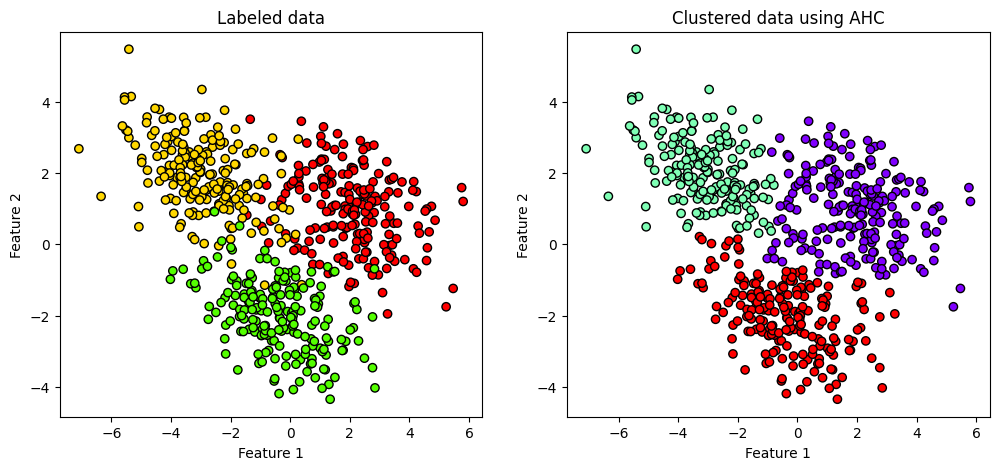

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='prism', edgecolors='k')
ax[0].set_title('Labeled data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[1].scatter(X[:, 0], X[:, 1], c=ahc.labels_, cmap='rainbow_r', edgecolors='k')
ax[1].set_title('Clustered data using AHC')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

**K Means along with Gaussian Mixture Model**

K-means gives us a quick, simple clustering and finds rough cluster centers (centroids).

GMM takes it further by modeling clusters as elliptical Gaussian distributions, giving soft assignments (probabilities) instead of hard ones.

In [18]:
from sklearn.cluster import KMeans

In [20]:
# Build a model with fixed random_state
kmeans = KMeans(n_clusters=nCluster, max_iter=500, random_state=4)
# Train the kmean models and print out the centroids
kmeans.fit(X)
centroids=kmeans.cluster_centers_
print('Centroids: \n', centroids)
print('\nNumber of samples in each cluster')
print('label 0: ', (kmeans.labels_ == 0).sum())
print('Label 1: ', (kmeans.labels_ == 1).sum())
print('Lable 2: ', (kmeans.labels_ == 2).sum())

Centroids: 
 [[-0.24229413 -1.9486165 ]
 [-3.02206509  1.89704585]
 [ 2.2072361   0.98160236]]

Number of samples in each cluster
label 0:  200
Label 1:  208
Lable 2:  192


In [21]:
# Initialize GaussianMixture with K-means initialization
# and the same number of components as K-means clusters
gmm = GaussianMixture(n_components=nCluster, init_params='kmeans', random_state=0)
gmm.fit(X)
# Calculate and print AIC and BIC
aic = gmm.aic(X)
bic = gmm.bic(X)
print(f"\nAIC for K-means with {nCluster} clusters: {aic}")
print(f"BIC for K-means with {nCluster} clusters: {bic}")


AIC for K-means with 3 clusters: 4910.303180744462
BIC for K-means with 3 clusters: 4985.050984883137


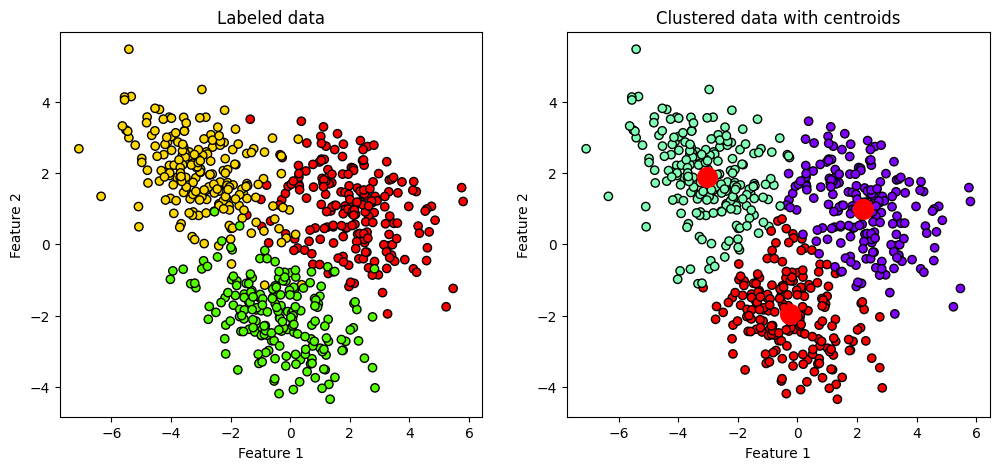

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='prism', edgecolors='k')
ax[0].set_title('Labeled data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[1].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow_r', edgecolors='k')
ax[1].set_title('Clustered data with centroids')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].scatter(centroids[:, 0], centroids[:, 1], s=200, c='red')
plt.show()
